In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('train_data.csv')

In [3]:
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [4]:
df.isnull().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64

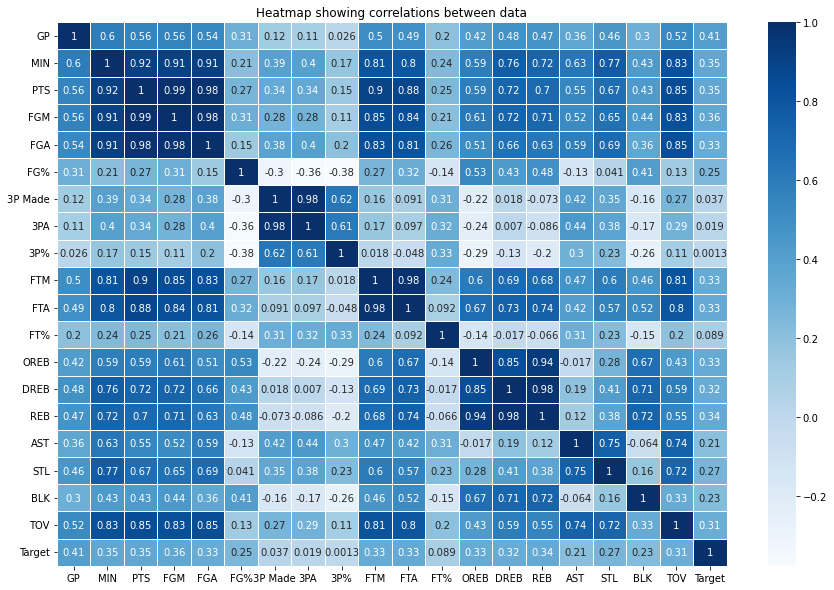

In [5]:
plt.figure(figsize=(15,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between data')
plt.show()

In [6]:
df.corr().unstack().sort_values(ascending = False)

GP   GP         1.000000
FTA  FTA        1.000000
FGM  FGM        1.000000
FGA  FGA        1.000000
FG%  FG%        1.000000
                  ...   
     3P Made   -0.304532
     3PA       -0.360298
3PA  FG%       -0.360298
FG%  3P%       -0.376032
3P%  FG%       -0.376032
Length: 400, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.Target
y_val = df_val.Target
y_test = df_test.Target

del df_train['Target']
del df_val['Target']
del df_test['Target']

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

scores = []
depths = [10, 15, 20, 25, 50, 100]

for d in depths:
    dt = DecisionTreeClassifier(max_depth = d, random_state=1)
    dt.fit(df_train, y_train)
    y_pred = dt.predict(df_val)
    score = accuracy_score(y_val, y_pred) * 100
    scores.append((d,score))

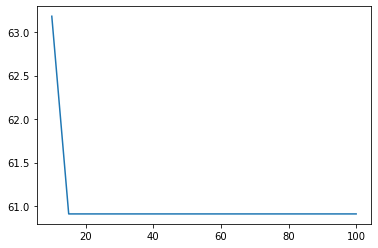

In [9]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'accuracy'])
plt.plot(df_scores.max_depth, df_scores.accuracy)

In [10]:
from sklearn.ensemble import RandomForestClassifier
scores = []
ns = [10, 20, 30, 40, 50, 100]

for n in ns:
    rf = RandomForestClassifier(n_estimators = n, random_state = 1, n_jobs = -1)
    rf.fit(df_train, y_train)
    y_pred = rf.predict(df_val)
    score = accuracy_score(y_val, y_pred) * 100
    scores.append((n,score))

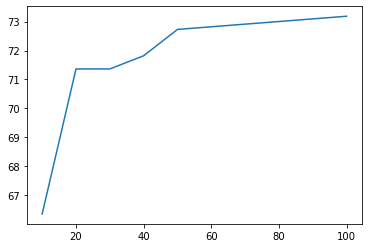

In [11]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [12]:
scores = []
depths = [10, 15, 20, 25, 50, 100]
n = 100

for d in depths:
    rf = RandomForestClassifier(n_estimators = n, max_depth = d, random_state = 1, n_jobs = -1)
    rf.fit(df_train, y_train)
    y_pred = rf.predict(df_val)
    score = accuracy_score(y_val, y_pred) * 100
    scores.append((d,score))

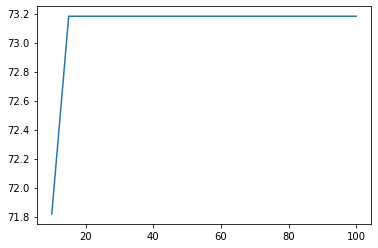

In [13]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'rmse'])
plt.plot(df_scores.max_depth, df_scores.rmse)

In [14]:
rf = RandomForestClassifier(n_estimators = 10, max_depth = 10, random_state = 1, n_jobs = -1)
rf.fit(df_train, y_train)
y_pred = rf.predict(df_test)
rfscore = accuracy_score(y_test, y_pred) * 100

In [15]:
dt = DecisionTreeClassifier(max_depth = 10, random_state=1)
dt.fit(df_train, y_train)
y_pred = dt.predict(df_test)
dtscore = accuracy_score(y_test, y_pred) * 100

In [16]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(df_train,y_train)
y_pred = xgb_cl.predict(df_val)
xgb_score = accuracy_score(y_val, y_pred)

In [17]:
import lightgbm as lgb
lgb_cl = lgb.LGBMClassifier()
lgb_cl.fit(df_train,y_train)
y_pred = lgb_cl.predict(df_test)
lgb_score = accuracy_score(y_test, y_pred)

In [18]:
[xgb_score, lgb_score, dtscore,rfscore]


[0.7, 0.7104072398190046, 66.51583710407239, 70.13574660633483]

In [19]:
df_full = df.reset_index(drop=True)
y_full = df_full.Target

del df_full['Target']

In [20]:
df_submission = pd.read_csv('test_data.csv')

In [21]:
df_submission.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,44.0,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,1.1,1.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0
1,51.0,9.1,2.7,1.0,2.7,39.0,0.1,0.3,23.5,0.6,0.8,69.8,0.3,0.7,1.0,0.9,0.6,0.1,0.7
2,51.0,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,1.1,1.6,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4
3,15.0,7.9,1.9,0.7,2.5,27.0,0.0,0.0,0.0,0.5,0.8,66.7,0.5,1.1,1.5,0.5,0.1,0.1,1.0
4,36.0,14.4,5.8,2.3,5.4,43.1,0.0,0.1,50.0,1.1,1.4,82.0,1.1,1.4,2.4,0.9,0.3,0.2,0.9


In [22]:
lgb_cl = lgb.LGBMClassifier()
lgb_cl.fit(df_full,y_full)
lgb_pred = lgb_cl.predict(df_submission)

In [23]:
submission = pd.Series(lgb_pred, name='prediction')

In [24]:
submission = pd.DataFrame({'prediction': submission})
submission.to_csv('lgb_submission.csv', index=False)

In [25]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(df_full,y_full)
xgb_pred = xgb_cl.predict(df_submission)

In [ ]:
submission = pd.Series(xgb_pred, name='prediction')

In [ ]:
submission = pd.DataFrame({'prediction': submission})
submission.to_csv('xgb_submission.csv', index=False)

In [ ]:
rf = RandomForestClassifier(n_estimators = 10, max_depth = 10, random_state = 1, n_jobs = -1)
rf.fit(df_full,y_full)
rf_pred = rf.predict(df_submission)

In [ ]:
submission = pd.Series(rf_pred, name='prediction')

In [ ]:
submission = pd.DataFrame({'prediction': submission})
submission.to_csv('rf_submission.csv', index=False)

In [ ]:
dt = DecisionTreeClassifier(max_depth = 10, random_state=1)
dt.fit(df_full,y_full)
dt_pred = dt.predict(df_submission)

In [ ]:
submission = pd.Series(dt_pred, name='prediction')

In [ ]:
submission = pd.DataFrame({'prediction': submission})
submission.to_csv('dt_submission.csv', index=False)